In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('training_set_features.csv')
df_labels=pd.read_csv('training_set_labels.csv')

In [3]:
df_labels.columns

Index(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], dtype='object')

In [4]:
df=df_train
df['xyz_vaccine']=df_labels['xyz_vaccine']
df['seasonal_vaccine']=df_labels['seasonal_vaccine']

####
EDA

In [5]:
df.head(10)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [6]:
df.tail()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [7]:
df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [8]:
df.shape

(26707, 38)

In [9]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [10]:
df.drop(columns=['employment_occupation', 'employment_industry', 'hhs_geo_region','census_msa'], inplace=True)

In [11]:
df.shape

(26707, 34)

In [12]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [14]:
df['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [15]:
# Define a mapping of age groups to representative ages
age_mapping = {
    '55 - 64 Years': 60,
    '35 - 44 Years': 40,
    '45 - 54 Years': 50,
    '65+ Years': 70,
    '18 - 34 Years': 26  # Midpoint of the 18-34 range
}

# Create a new column with the representative age
df['age'] = df['age_group'].map(age_mapping)

In [16]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
sex_mapping = {
    'Male': 1,
    'Female': 0
}

# Create a new column with the representative age
df['sex_num'] = df['sex'].map(sex_mapping)

In [18]:
df['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [19]:
income_mapping = {
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3
}

# Create a new column with the representative value
df['income_level'] = df['income_poverty'].map(income_mapping)

In [20]:
df.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [21]:
df.shape

(26707, 37)

In [22]:
df['health_insurance'].fillna(2, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_29820\1473675977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['health_insurance'].fillna(2, inplace=True)


In [23]:
df.shape

(26707, 37)

In [24]:
df.drop(columns=['sex', 'age_group','income_poverty'], inplace=True)

In [25]:
df.isnull().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
education                      1407
race                              0
marital_status                 1408
rent_or_own                    2042
employment_status              1463
household_adults            

Handeling Missing values

In [26]:
df.dropna(subset=['doctor_recc_xyz','xyz_concern','xyz_knowledge',
'behavioral_antiviral_meds',   
'behavioral_avoidance',          
'behavioral_face_mask',
'behavioral_wash_hands',         
'behavioral_large_gatherings',   
'behavioral_outside_home', 
'behavioral_touch_face','opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults',
'household_children','health_worker','child_under_6_months' ], inplace=True)

In [27]:
df.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition           194
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
education                       493
race                              0
marital_status                  491
rent_or_own                    1058
employment_status               544
household_adults            

In [28]:
df.shape

(23170, 34)

In [29]:
df.loc[(df['age']>= 60)& (df['employment_status'].isna()), 'employment_status'] = 'Unemployed'

In [30]:
# Fill NaN values in 'employment_status' where 'education' < 12 Years
df.loc[(df['education'] == '< 12 Years') & (df['employment_status'].isna()), 'employment_status'] = 'Unemployed'

In [31]:
df.loc[(df['education'] == 'College Graduate') & (df['employment_status'].isna()), 'employment_status'] = 'Employed'

In [32]:
df.loc[(df['education'] == '< 12 Years') & (df['income_level'].isna()), 'income_level'] = 1
df.loc[(df['education'] == 'College Graduate') & (df['income_level'].isna()), 'income_level'] = 3
df.loc[(df['education'] == '12 Years') & (df['income_level'].isna()), 'income_level'] = 2
df.loc[(df['education'] == 'Some College') & (df['income_level'].isna()), 'income_level'] = 2

In [33]:
df.loc[(df['income_level']==3)& (df['education'].isna()), 'education']= 'College Graduate'
df.loc[(df['income_level']==1)& (df['education'].isna()), 'education']= '< 12 Years'

In [34]:
df.loc[(df['age']>= 35)& (df['marital_status'].isna()),'marital_status']= 'Married'
df.loc[(df['age']< 35)& (df['marital_status'].isna()),'marital_status']= 'Not Married'

In [35]:
nan_indices = df[df['chronic_med_condition'].isna()].index
random_choices = np.random.choice([0, 1], size=len(nan_indices))

# Fill NaN values with the random choices
df.loc[nan_indices, 'chronic_med_condition'] = random_choices

In [36]:
df.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
education                       465
race                              0
marital_status                    0
rent_or_own                    1058
employment_status               373
household_adults            

In [37]:
df.dropna(subset=['rent_or_own','education','employment_status'],inplace=True)

In [38]:
df.shape

(22012, 34)

In [39]:
df.head(5)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine,age,sex_num,income_level
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,0.0,0.0,0,0,60,0,1.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,0.0,0.0,0,1,40,1,1.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,0.0,0.0,0,1,70,0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,1.0,0.0,0,0,50,0,2.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Married,Own,Employed,2.0,3.0,0,0,70,1,2.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22012 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                22012 non-null  int64  
 1   xyz_concern                  22012 non-null  float64
 2   xyz_knowledge                22012 non-null  float64
 3   behavioral_antiviral_meds    22012 non-null  float64
 4   behavioral_avoidance         22012 non-null  float64
 5   behavioral_face_mask         22012 non-null  float64
 6   behavioral_wash_hands        22012 non-null  float64
 7   behavioral_large_gatherings  22012 non-null  float64
 8   behavioral_outside_home      22012 non-null  float64
 9   behavioral_touch_face        22012 non-null  float64
 10  doctor_recc_xyz              22012 non-null  float64
 11  doctor_recc_seasonal         22012 non-null  float64
 12  chronic_med_condition        22012 non-null  float64
 13  child_under_6_months 

In [41]:
married_mapping = {
    'Married': 1,
    'Not Married': 0
}

# Create a new column with the representative age
df['marital_status'] = df['marital_status'].map(married_mapping)

In [42]:
df.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [43]:
df_encoded = pd.get_dummies(df, columns=['employment_status', 'education','rent_or_own','race','health_insurance'])

In [44]:
df_encoded.shape

(22012, 45)

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22012 entries, 0 to 26706
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         22012 non-null  int64  
 1   xyz_concern                           22012 non-null  float64
 2   xyz_knowledge                         22012 non-null  float64
 3   behavioral_antiviral_meds             22012 non-null  float64
 4   behavioral_avoidance                  22012 non-null  float64
 5   behavioral_face_mask                  22012 non-null  float64
 6   behavioral_wash_hands                 22012 non-null  float64
 7   behavioral_large_gatherings           22012 non-null  float64
 8   behavioral_outside_home               22012 non-null  float64
 9   behavioral_touch_face                 22012 non-null  float64
 10  doctor_recc_xyz                       22012 non-null  float64
 11  doctor_recc_seasonal

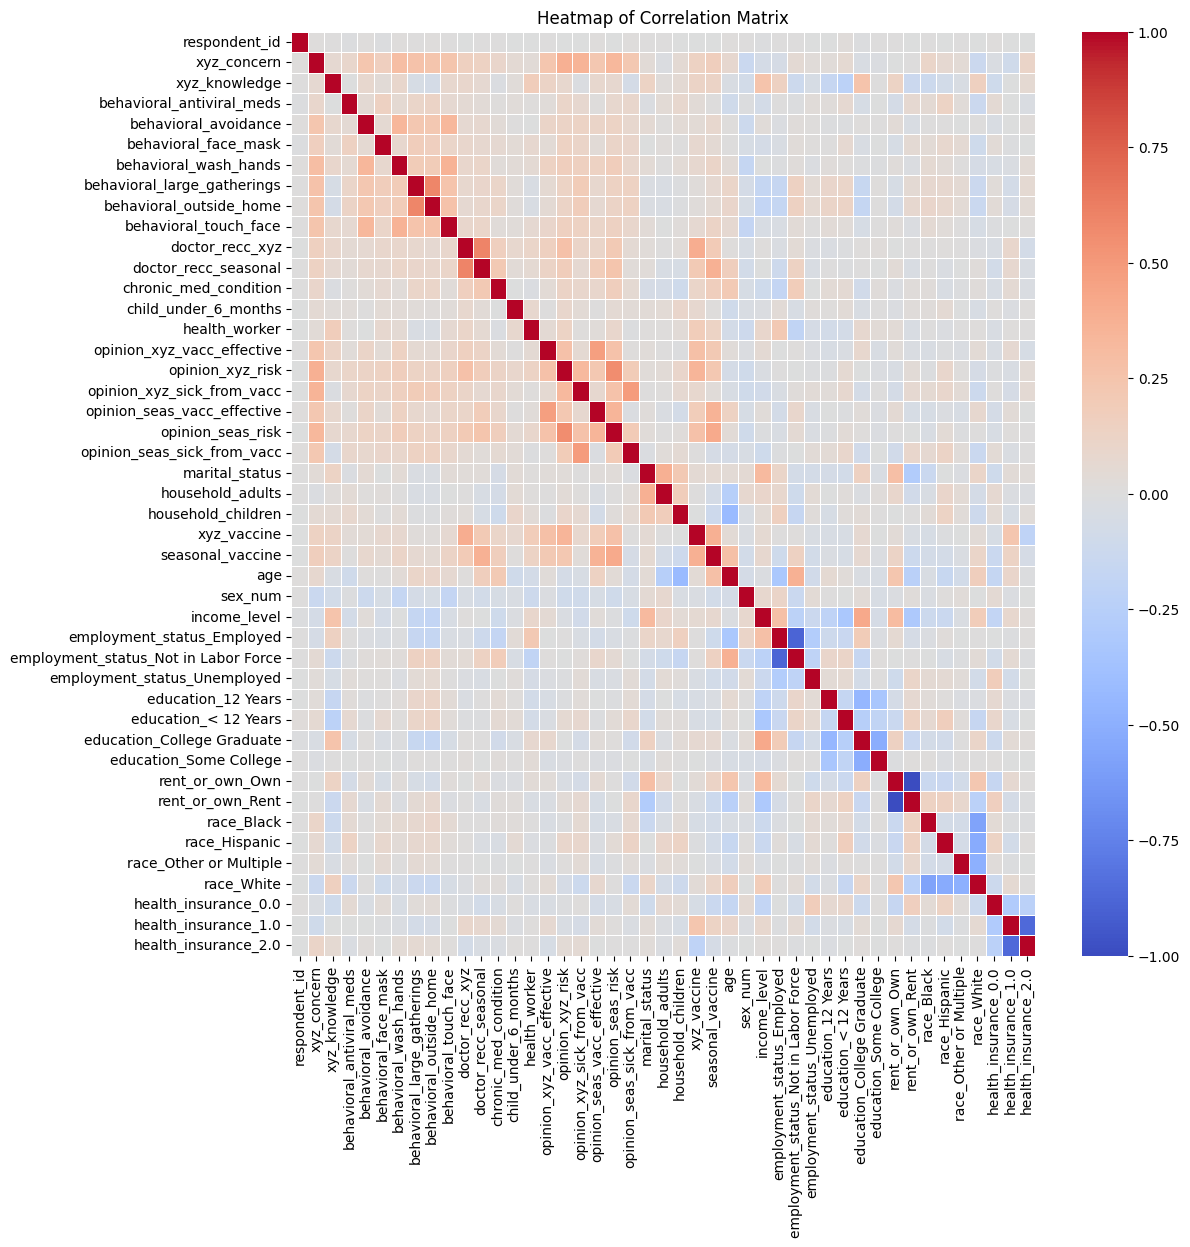

In [46]:
# Generate a correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [47]:
data=pd.read_csv('test_set_features.csv')

In [48]:
data.shape

(26708, 36)

In [49]:
data.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [50]:
data.drop(columns=['employment_occupation', 'employment_industry', 'hhs_geo_region','census_msa'], inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo